Тестовое задание,
Николаева Валерия

## Задание 1

In [2]:
# импортируем необходимые библиотеки
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification

# в качестве классификатора будет выступать обычная лог. регрессия
from sklearn.linear_model import LogisticRegression

In [4]:
# создаём искусственные данные
X, y = make_classification(n_samples=1000, n_features=20, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [6]:
clf = LogisticRegression()
clf.fit(X_train, y_train)

y_scores = clf.predict_proba(X_test)[:,1]  # вероятности принадлежности  одному из классов

In [15]:
# функция для построения графиков
def plot_roc_curve(y_test, y_scores, title):
    fpr, tpr, _ = roc_curve(y_test, y_scores)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, lw=2, label=f'ROC curve (area = {roc_auc:0.2f})')
    plt.plot([0, 1], [0, 1], linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(title)
    plt.legend(loc='lower right')
    plt.show()

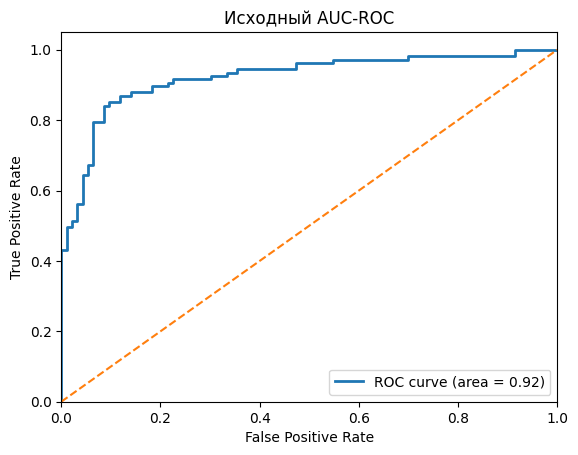

In [21]:
# Исходный AUC-ROC
plt.figure()
plot_roc_curve(y_test, y_scores, 'Исходный AUC-ROC')

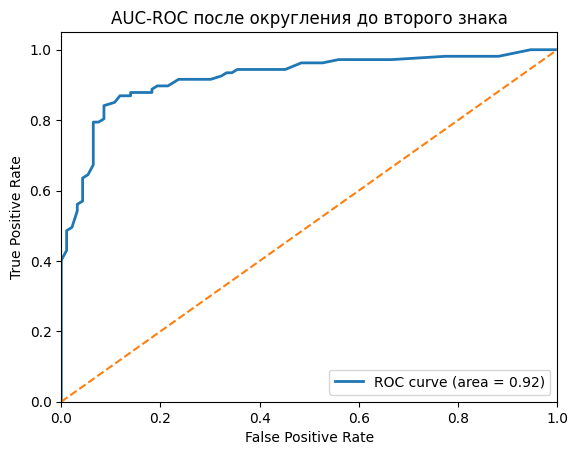

In [22]:
# 1. Округление до второго знака после запятой
y_scores_rounded = np.round(y_scores, 2)
plt.figure()
plot_roc_curve(y_test, y_scores_rounded, 'AUC-ROC после округления до второго знака')

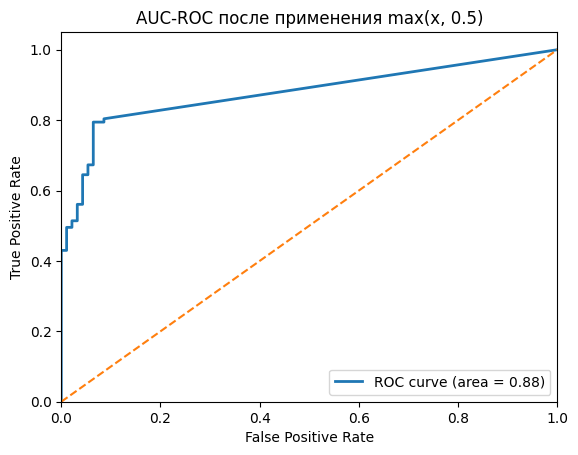

In [47]:
# 2. Применение max(x, 0.5)
y_scores_max = np.maximum(y_scores, 0.5)
plt.figure()
plot_roc_curve(y_test, y_scores_max, 'AUC-ROC после применения max(x, 0.5)')

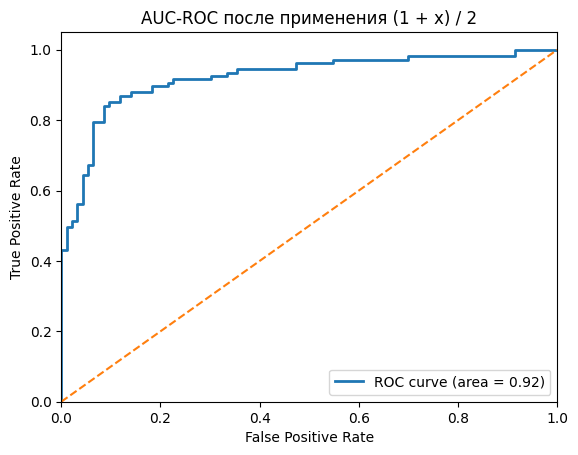

In [48]:
# 3. Применение (1 + x) / 2
y_scores_transformed = (1 + y_scores) / 2
plt.figure()
plot_roc_curve(y_test, y_scores_transformed, 'AUC-ROC после применения (1 + x) / 2')

## Задание 2

In [25]:
# для этого задания понадобятся ещё эти библиотеки
import pandas as pd
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.datasets import make_regression
from sklearn.preprocessing import StandardScaler

In [26]:
# создаём искусственные данные
X, y = make_regression(n_samples=100, n_features=2, noise=0.1, random_state=42)

In [27]:
# создаем сильную корреляцию между признаками
X[:, 1] = X[:, 0] + np.random.normal(scale=0.01, size=X[:, 0].shape)

In [29]:
df = pd.DataFrame(X, columns=['Feature1', 'Feature2'])
df['Target'] = y
df

,Feature1,Feature2,Target
0,-1.191303,-1.179181,-55.820117
1,0.058209,0.063686,-79.616595
2,0.586857,0.592116,213.726083
3,0.473238,0.460164,36.056367
4,0.738467,0.739814,77.554120
...,...,...,...
95,0.361396,0.365116,145.659445
96,0.296120,0.292134,45.192863
97,-0.990536,-0.981526,-128.981327
98,-0.460639,-0.461877,38.001987


from matplotlib import pyplot as plt
df['Feature1'].plot(kind='hist', bins=20, title='Feature1')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
df['Feature2'].plot(kind='hist', bins=20, title='Feature2')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
df['Target'].plot(kind='hist', bins=20, title='Target')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
df.plot(kind='scatter', x='Feature1', y='Feature2', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
df.plot(kind='scatter', x='Feature2', y='Target', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
df['Feature1'].plot(kind='line', figsize=(8, 4), title='Feature1')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
df['Feature2'].plot(kind='line', figsize=(8, 4), title='Feature2')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
df['Target'].plot(kind='line', figsize=(8, 4), title='Target')
plt.gca().spines[['top', 'right']].set_visible(False)

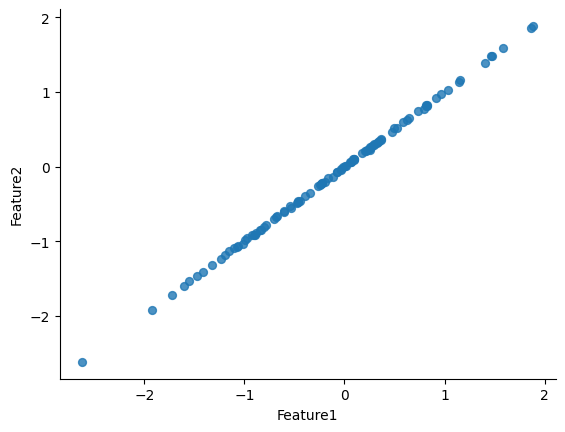

In [45]:
# вот такой график предложил сам колаб :)
from matplotlib import pyplot as plt
df.plot(kind='scatter', x='Feature1', y='Feature2', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

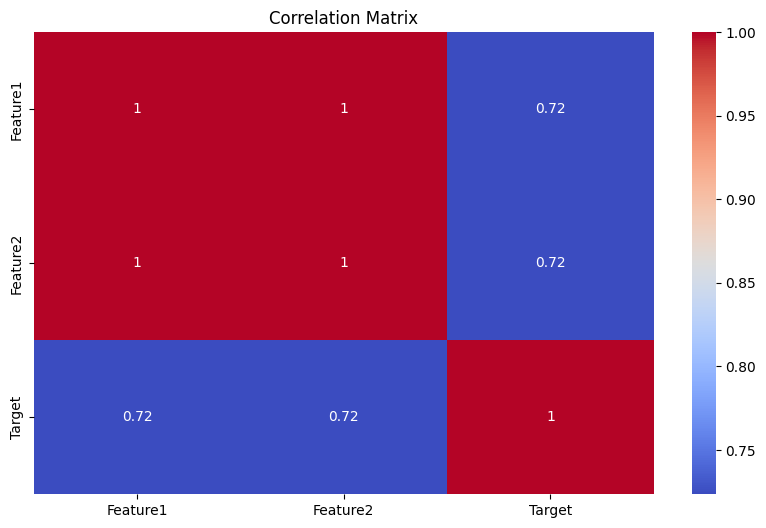

In [31]:
# тепловая карта для отображения корреляции
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [32]:
model = LinearRegression()
model.fit(X, y)

LinearRegression()

In [39]:
# вывод коэффициентов регрессии
coef_df = pd.DataFrame(model.coef_, index=['Feature1', 'Feature2'], columns=['Coefficient'])
print("Коэффициенты регрессии без нормализации:")
coef_df

Коэффициенты регрессии без нормализации:


,Coefficient
Feature1,-1049.746200
Feature2,1141.588934


In [40]:
# а теперь нормализируем данные
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

model_scaled = LinearRegression()
model_scaled.fit(X_scaled, y)

LinearRegression()

In [41]:
# вывод нормализованных коэффициентов регрессии
coef_df_scaled = pd.DataFrame(model_scaled.coef_, index=['Feature1', 'Feature2'], columns=['Coefficient'])
print("\nКоэффициенты регрессии с нормализацией:")
coef_df_scaled


Коэффициенты регрессии с нормализацией:


,Coefficient
Feature1,-894.405688
Feature2,971.582980


In [42]:
# с мультиколлинеарностью и отрицательным весом
print("\nПример с отрицательным весом:")
df['NewFeature'] = df['Feature1'] * 2 + np.random.normal(scale=0.1, size=df['Feature1'].shape)
X_2 = df[['Feature1', 'NewFeature']].values
model_2 = LinearRegression()
model_2.fit(X_2, y)


Пример с отрицательным весом:


LinearRegression()

In [46]:
# вывод коэффициентов регрессии для примера
coef_2_df = pd.DataFrame(model_2.coef_, index=['Feature1', 'NewFeature'], columns=['Coefficient'])
coef_2_df

,Coefficient
Feature1,101.144041
NewFeature,-5.311691


*Есть ли гарантия их отсутствия при линейно
независимых признаках?*

Не совсем. Коэффициенты будут более стабильны и интерпретируемы, но например сильный шум в данных или использование линейной регрессии при нелинейных зависимостях может привести к неправильным выводам и негативно повлиять на результаты.